# Proprietà delle variabili casuali {#sec-random-variables}

**Prerequisiti**

Prima di affrontare il presente capitolo, è essenziale leggere la sezione @sec-calculus.

**Concetti e Competenze Chiave**

- Approfondire i concetti di valore atteso e varianza per variabili casuali discrete.
- Acquisire familiarità con le principali proprietà associate al valore atteso e alla varianza.
- Estendere la comprensione di valore atteso e varianza alle variabili casuali continue.
- Utilizzare Python per calcolare effettivamente queste metriche.
- Interpretare criticamente i risultati ottenuti dalle analisi.

**Preparazione del Notebook**

In [1]:
import numpy as np
from scipy import stats as stats
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns

In [2]:
seed: int = sum(map(ord, "expval_var"))
rng: np.random.Generator = np.random.default_rng(seed=seed)
sns.set_theme(palette="colorblind")
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = "retina"

## Introduzione {.unnumbered}

Sintetizzare la distribuzione di una variabile casuale attraverso indicatori caratteristici è spesso molto utile. Questi indicatori consentono di cogliere le principali proprietà della distribuzione, come la posizione centrale (ovvero il "baricentro") e la variabilità (ossia la dispersione attorno al centro). In questo modo, è possibile ottenere una descrizione sintetica e significativa della distribuzione di probabilità della variabile casuale. 

In questo capitolo, introdurremo i concetti fondamentali di valore atteso e varianza di una variabile casuale, che sono strumenti essenziali per comprendere e riassumere le proprietà di una distribuzione probabilistica.

## Valore Atteso

Quando vogliamo comprendere il comportamento tipico di una variabile casuale, ci interessa spesso determinare il suo "valore tipico". Tuttavia, questa nozione può essere interpretata in diversi modi:

- **Media**: La somma dei valori divisa per il numero dei valori.
- **Mediana**: Il valore centrale della distribuzione, quando i dati sono ordinati in senso crescente o decrescente.
- **Moda**: Il valore che si verifica con maggiore frequenza.

Ad esempio, per il set di valori $\{3, 1, 4, 1, 5\}$, la media è $\frac{3+1+4+1+5}{5} = 2.8$, la mediana è 3, e la moda è 1. Tuttavia, quando ci occupiamo di variabili casuali, anziché di semplici sequenze di numeri, diventa necessario chiarire cosa intendiamo per "valore tipico" in questo contesto. Questo ci porta alla definizione formale del valore atteso.

::: {#def-}

Sia $X$ una variabile casuale discreta che assume i valori $x_1, \dots, x_n$ con probabilità $P(X = x_i) = p(x_i)$. Il *valore atteso* di $X$, denotato con $\mathbb{E}(X)$, è definito come:

$$
\mathbb{E}(X) = \sum_{i=1}^n x_i \cdot p(x_i).
$$

:::

In altre parole, il valore atteso (noto anche come speranza matematica o aspettazione) di una variabile casuale è la somma di tutti i valori che la variabile può assumere, ciascuno ponderato dalla probabilità con cui esso si verifica.

::: {#exm-}
Calcoliamo il valore atteso della variabile casuale $X$ corrispondente al lancio di una moneta equilibrata, dove *testa* corrisponde a $X = 1$ e *croce* corrisponde a $X = 0$:

$$
\mathbb{E}(X) = \sum_{i=1}^{2} x_i \cdot P(x_i) = 0 \cdot \frac{1}{2} + 1 \cdot \frac{1}{2} = 0.5.
$$
:::

::: {#exm-}
Calcoliamo il valore atteso della variabile casuale $X$ che rappresenta la somma dei punti ottenuti dal lancio di due dadi equilibrati a sei facce.

Come abbiamo visto nel @sec-intro_random_var, $X$ può assumere i valori [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] con una distribuzione di massa di probabilità pari a [1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36]. Applicando la formula del valore atteso, otteniamo:

$$
\mathbb{E}(X) = \sum_{i=1}^{11} x_i \cdot P(x_i) = 2 \cdot \frac{1}{36} + 3 \cdot \frac{2}{36} + \dots + 12 \cdot \frac{1}{36} = 7.0.
$$

:::


::: {#exm-}

Vediamo ora come eseguire i calcoli del valore atteso utilizzando Python. Per prima cosa, definiamo i valori della variabile casuale e li trasformiamo in un array NumPy:

In [3]:
x = np.array(list(range(2, 13)))
x

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Successivamente, calcoliamo la distribuzione di massa della variabile casuale $X$, come visto nel @sec-intro-prob.

In [6]:
r = range(1, 7)
sample = [(i, j) for i in r for j in r]

px = []

for i in range(2, 13):
    event = [roll for roll in sample if sum(roll) == i]
    px.append(len(event) / len(sample))

px = np.array(px)
px

array([0.02777778, 0.05555556, 0.08333333, 0.11111111, 0.13888889,
       0.16666667, 0.13888889, 0.11111111, 0.08333333, 0.05555556,
       0.02777778])

Ora, possiamo calcolare il valore atteso di $X$ utilizzando la formula del valore atteso per variabili casuali discrete:

In [7]:
ex = np.sum(x * px)
ex.round(3)

7.0

In alternativa, possiamo utilizzare le funzioni del modulo `rv_discrete` della libreria `scipy.stats` per ottenere il valore atteso:

In [8]:
x = np.arange(2, 13)
px = np.array([1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36])
X = stats.rv_discrete(values=(x, px))

Una volta definito l'oggetto $X$ con `rv_discrete()`, possiamo calcolare il valore atteso utilizzando la funzione `expect()`:

In [9]:
x_ev = X.expect()
round(x_ev, 3)

7.0

Questi metodi dimostrano come sia possibile calcolare il valore atteso di una variabile casuale sia attraverso un approccio diretto con NumPy, sia utilizzando gli strumenti avanzati di `scipy.stats`.

:::

### Interpretazione

Il valore atteso di una variabile casuale corrisponde alla media aritmetica di un ampio numero di realizzazioni indipendenti della variabile stessa.

Per chiarire questo concetto, consideriamo nuovamente l'esempio del lancio di due dadi bilanciati a sei facce, dove la variabile casuale $X$ rappresenta la "somma dei due dadi". Per interpretare il valore atteso, possiamo simulare un grande numero di realizzazioni indipendenti di $X$ utilizzando la funzione `np.random.choice()` della libreria NumPy. Questa funzione permette di generare campioni casuali basati sui valori della variabile casuale, sul numero di ripetizioni indipendenti (qui 1.000.000) e sulla distribuzione di massa di probabilità associata:

```python
x_samples = np.random.choice(x, size=1000000, p=px)
```

L'istruzione `np.random.choice(x, size=1000000, p=px)` utilizza NumPy per generare un array di 1.000.000 di elementi (specificato dal parametro `size`), selezionati casualmente dall'array `x` secondo le probabilità specificate nell'array `px`. In questo contesto, `x` è l'array contenente i possibili valori di $X$, mentre `px` è un array che rappresenta le probabilità associate a ciascun valore di $x$.

Come ci si aspetterebbe, quando il numero di realizzazioni indipendenti è sufficientemente grande, la media aritmetica dei campioni generati si avvicina al valore atteso della variabile casuale:

In [11]:
np.mean(x_samples).round(3)

7.002

Questo risultato conferma che, con un numero elevato di simulazioni, la media aritmetica dei valori ottenuti fornisce una buona approssimazione del valore atteso teorico di $X$.

### Proprietà del Valore Atteso

Una delle proprietà più importanti del valore atteso è la sua **linearità**: il valore atteso della somma di due variabili casuali è uguale alla somma dei loro rispettivi valori attesi:

$$
\mathbb{E}(X + Y) = \mathbb{E}(X) + \mathbb{E}(Y).
$$ {#eq-prop-expval-linearity}

Questa proprietà, espressa dalla formula sopra, è intuitiva quando $X$ e $Y$ sono variabili casuali indipendenti, ma è valida anche nel caso in cui $X$ e $Y$ siano correlate.

Inoltre, se moltiplichiamo una variabile casuale per una costante $c$, il valore atteso del prodotto è uguale alla costante moltiplicata per il valore atteso della variabile casuale:

$$
\mathbb{E}(cY) = c \mathbb{E}(Y).
$$  {#eq-prop-expval-const}

Questa proprietà ci dice che una costante può essere "estratta" dall'operatore di valore atteso, e si applica a qualunque numero di variabili casuali.

Un'altra proprietà significativa riguarda il prodotto di variabili casuali indipendenti. Se $X$ e $Y$ sono indipendenti, allora il valore atteso del loro prodotto è uguale al prodotto dei loro valori attesi:

$$
\mathbb{E}(XY) = \mathbb{E}(X) \mathbb{E}(Y).
$$ {#eq-expval-prod-ind-rv}

Infine, consideriamo la media aritmetica $\bar{X} = \frac{X_1 + \ldots + X_n}{n}$ di $n$ variabili casuali indipendenti con la stessa distribuzione e con valore atteso $\mu$. Il valore atteso della media aritmetica è:

$$
\mathbb{E}(\bar{X}) = \frac{1}{n} \left(\mathbb{E}(X_1) + \dots + \mathbb{E}(X_n)\right) = \frac{1}{n} \cdot n \cdot \mathbb{E}(X) = \mu.
$$

Questo risultato conferma che la media aritmetica di un campione di variabili casuali indipendenti ha lo stesso valore atteso della distribuzione originaria, rendendo il valore atteso uno strumento cruciale per l'analisi statistica e probabilistica.

::: {#exm-}

Consideriamo il seguente esperimento casuale. Sia $Y$ il numero che si ottiene dal lancio di un dado equilibrato a sei facce e $Y$ il numero di teste prodotto dal lancio di una moneta equilibrata (0 oppure 1). Troviamo il valore atteso di $X+Y$.

Per risolvere il problema iniziamo a costruire lo spazio campione dell'esperimento casuale.

| $x /\ y$ |   1    |   2    |   3    |   4    |   5    |   6    |
|:--------------------:|:------:|:------:|:------:|:------:|:------:|:------:|
|          0           | (0, 1) | (0, 2) | (0, 3) | (0, 4) | (0, 5) | (0, 6) |
|          1           | (1, 1) | (1, 2) | (1, 3) | (1, 4) | (1, 5) | (1, 6) |

ovvero

| $x /\ y$ |  1  |  2  |  3  |  4  |  5  |  6  |
|:--------------------:|:---:|:---:|:---:|:---:|:---:|:---:|
|          0           |  1  |  2  |  3  |  4  |  5  |  6  |
|          1           |  2  |  3  |  4  |  5  |  6  |  7  |

Il risultato del lancio del dado è indipendente dal risultato del lancio della moneta. Pertanto, ciascun evento elementare dello spazio campione avrà la stessa probabilità di verificarsi, ovvero $P(\omega) = \frac{1}{12}$. Il valore atteso di $X+Y$ è dunque uguale a:

$$
\mathbb{E}(X+Y) = 1 \cdot \frac{1}{12} + 2 \cdot \frac{1}{12} + \dots + 7 \cdot \frac{1}{12} = 4.0.
$$

Si ottiene lo stesso risultato usando l'@eq-prop-expval-linearity:

$$
\mathbb{E}(X+Y) = \mathbb{E}(X) + E(Y) = 3.5 + 0.5 = 4.0.
$$

:::

::: {#exm-}

Svolgiamo ora l'esercizio in Python.

In [12]:
coin = range(0, 2)
die = range(1, 7)

sample = [(c, d) for c in coin for d in die]
list(sample)

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6)]

In [13]:
px = []
for i in range(1, 8):
    event = [roll for roll in sample if sum(roll) == i]
    px.append(len(event) / len(sample))
    print(f"P(X + Y = {i}) = {len(event)} / {len(sample)}")


P(X + Y = 1) = 1 / 12
P(X + Y = 2) = 2 / 12
P(X + Y = 3) = 2 / 12
P(X + Y = 4) = 2 / 12
P(X + Y = 5) = 2 / 12
P(X + Y = 6) = 2 / 12
P(X + Y = 7) = 1 / 12


In [14]:
x = np.arange(1, 8)
sum(x * px)

4.0

:::

::: {#exm-}
Consideriamo le variabili casuali $X$ e $Y$ definite nel caso del lancio di tre monete equilibrate, dove $X$ conta il numero delle teste nei tre lanci e $Y$ conta il numero delle teste al primo lancio. Si calcoli il valore atteso di $Z = X \cdot Y$.

La distribuzione di probabilità congiunta $P(X, Y)$ è fornita nella tabella seguente.

| $x /\ y$ |  0  |  1  | $p(Y)$ |
|:--------------------:|:---:|:---:|:------:|
|          0           | 1/8 |  0  |  1/8   |
|          1           | 2/8 | 1/8 |  3/8   |
|          2           | 1/8 | 2/8 |  3/8   |
|          3           |  0  | 1/8 |  1/8   |
|        $p(y)$        | 4/8 | 4/8 |  1.0   |

Il calcolo del valore atteso di $XY$ si riduce a

$$
\mathbb{E}(Z) = 1 \cdot \frac{1}{8} + 2 \cdot \frac{2}{8} + 3 \cdot \frac{1}{8} = 1.0.
$$

Si noti che le variabili casuali $Y$ e $Y$ non sono indipendenti. Dunque non possiamo usare l'@eq-expval-prod-ind-rv. Infatti, il valore atteso di $X$ è

$$
\mathbb{E}(X) = 1 \cdot \frac{3}{8} + 2 \cdot \frac{3}{8} + 3 \cdot \frac{1}{8} = 1.5
$$

e il valore atteso di $Y$ è

$$
\mathbb{E}(Y) = 0 \cdot \frac{4}{8} + 1 \cdot \frac{4}{8} = 0.5.
$$

Perciò

$$
1.5 \cdot 0.5 \neq 1.0.
$$

:::

### Variabili casuali continue

Nel caso di una variabile casuale continua $X$, il valore atteso è definito come:

$$
\mathbb{E}(X) = \int_{-\infty}^{+\infty} x \cdot p(x) \, \mathrm{d}x.
$$

Anche in questo contesto, il valore atteso rappresenta una media ponderata dei valori di $x$, dove ogni possibile valore di $x$ è ponderato in base alla densità di probabilità $p(x)$. 

L'integrale può essere interpretato analogamente a una somma continua, in cui $x$ rappresenta la posizione delle barre infinitamente strette di un istogramma, e $p(x)$ rappresenta l'altezza di tali barre. La notazione $\int_{-\infty}^{+\infty}$ indica che si sta sommando il contributo di ogni valore possibile di $x$ lungo l'intero asse reale.

Questa interpretazione rende chiaro come l'integrale calcoli una somma ponderata che si estende su tutti i possibili valori di $x$, fornendo una misura centrale della distribuzione della variabile casuale continua. Per ulteriori dettagli sulla notazione dell'integrale, si veda l'@sec-calculus.

#### Moda

Un'altra misura di tendenza centrale delle variabili casuali continue è la moda. La moda di $Y$ individua il valore $y$ più plausibile, ovvero il valore $y$ che massimizza la funzione di densità $p(y)$:

$$
Mo(Y) = \text{argmax}_y p(y).
$$ {#eq-def-mode}

::: {.callout-note}
La notazione $\text{argmax}_y p(y)$ significa: il valore $y$ tale per cui la funzione $p(y)$ assume il suo valore massimo.
:::

## Varianza

Dopo il valore atteso, la seconda proprietà più importante di una variabile casuale è la *varianza*.

::: {#def-}
Se $X$ è una variabile casuale discreta con distribuzione $p(x)$, la varianza di $X$, denotata con $\mathbb{V}(X)$, è definita come:

$$
\mathbb{V}(X) = \mathbb{E}\Big[\big(X - \mathbb{E}(X)\big)^2\Big].
$$ {#eq-def-var-rv}
:::

In altre parole, la varianza misura la deviazione media quadratica dei valori della variabile rispetto alla sua media. Se denotiamo il valore atteso di $X$ con $\mu = \mathbb{E}(X)$, la varianza $\mathbb{V}(X)$ diventa il valore atteso di $(X - \mu)^2$.

### Interpretazione della Varianza

La varianza rappresenta una misura della "dispersione" dei valori di $X$ intorno al suo valore atteso. Quando calcoliamo la varianza, stiamo effettivamente misurando quanto i valori di $X$ tendono a differire dalla media $\mu$. 

Per capire meglio, consideriamo la variabile casuale $X - \mathbb{E}(X)$, detta *scarto* o *deviazione* dalla media. Questa variabile rappresenta le "distanze" tra i valori di $X$ e il valore atteso $\mathbb{E}(X)$. Tuttavia, poiché lo scarto può essere positivo o negativo, la media dello scarto è sempre zero, il che lo rende inadatto a quantificare la dispersione. 

Per risolvere questo problema, eleviamo al quadrato gli scarti, ottenendo $(X - \mathbb{E}(X))^2$, che rende tutte le deviazioni positive. La varianza è quindi la media di questi scarti al quadrato, fornendo una misura efficace della dispersione complessiva dei valori di $X$ rispetto alla sua media. 

Questo concetto è fondamentale per comprendere la variabilità di una distribuzione e per applicare strumenti statistici che richiedono una conoscenza approfondita della distribuzione dei dati.


::: {#exm-}

Posta $S$ uguale alla somma dei punti ottenuti nel lancio di due dadi equilibrati, si calcoli la varianza di $S$.

La variabile casuale $S$ ha la seguente distribuzione di probabilità:

|    $s$     |       2        |       3        |       4        |       5        |       6        |       7        |       8        |       9        |       10       |       11       |       12       |
|:----------:|:--------------:|:--------------:|:--------------:|:--------------:|:--------------:|:--------------:|:--------------:|:--------------:|:--------------:|:--------------:|:--------------:|
| $P(S = s)$ | $\frac{1}{36}$ | $\frac{2}{36}$ | $\frac{3}{36}$ | $\frac{4}{36}$ | $\frac{5}{36}$ | $\frac{6}{36}$ | $\frac{5}{36}$ | $\frac{4}{36}$ | $\frac{3}{36}$ | $\frac{2}{36}$ | $\frac{1}{36}$ |

Essendo $\mathbb{E}(S) = 7$, la varianza diventa

$$
\begin{align}
\mathbb{V}(S) &= \sum \left(s - \mathbb{E}(S)\right)^2 \cdot P(s) \notag\\
&= (2 - 7)^2 \cdot \frac{1}{36} + (3-7)^2 \cdot \frac{3}{36} + \dots + (12 - 7)^2 \cdot \frac{1}{36} \notag\\
&= 5.8333.\notag
\end{align}
$$

:::

::: {#exm-}

Svolgiamo l'esercizio in Python.

In [17]:
x = np.arange(2, 13)
px = np.array(
    [
        1 / 36,
        2 / 36,
        3 / 36,
        4 / 36,
        5 / 36,
        6 / 36,
        5 / 36,
        4 / 36,
        3 / 36,
        2 / 36,
        1 / 36,
    ]
)
X = stats.rv_discrete(values=(x, px))
ex = X.expect()
ex

6.999999999999998

Applichiamo l'@eq-def-var-rv:

In [5]:
((x - ex) ** 2 * px).sum()

5.833333333333333

Usiamo la funzione `var()` di `rv_discrete`:

In [6]:
X.var()

5.833333333333364

:::

### Formula Alternativa per la Varianza

Esiste un metodo più semplice e diretto per calcolare la varianza di una variabile casuale $X$:

$$
\begin{align}
\mathbb{E}\Big[\big(X - \mathbb{E}(X)\big)^2\Big] &= \mathbb{E}\big(X^2 - 2Y\mathbb{E}(X) + \mathbb{E}(X)^2\big) \notag\\
&= \mathbb{E}(X^2) - 2\mathbb{E}(Y)\mathbb{E}(X) + \mathbb{E}(X)^2,
\end{align}
$$

dove $\mathbb{E}(X)$ è una costante. Semplificando ulteriormente, otteniamo:

$$
\mathbb{V}(X) = \mathbb{E}(X^2) - \big(\mathbb{E}(X)\big)^2.
$$ {#eq-def-alt-var-rv}

In altre parole, la varianza è data dalla differenza tra la media dei quadrati dei valori di $X$ e il quadrato della media di $X$.

Questa formula è utile perché permette di calcolare la varianza senza dover prima determinare lo scarto quadratico medio per ciascun valore di $X$. Invece, si può calcolare direttamente la media dei quadrati e sottrarre il quadrato della media, il che spesso semplifica i calcoli e riduce il rischio di errori.

::: {#exm-}

Consideriamo la variabile casuale $X$ che corrisponde al numero di teste che si osservano nel lancio di una moneta truccata con probabilità di testa uguale a 0.8. Si trovi la varianza di $Y$.

Il valore atteso di $X$ è

$$
\mathbb{E}(X) = 0 \cdot 0.2 + 1 \cdot 0.8 = 0.8.
$$

Usando la formula tradizionale della varianza otteniamo:

$$
\mathbb{V}(X) = (0 - 0.8)^2 \cdot 0.2 + (1 - 0.8)^2 \cdot 0.8 = 0.16.
$$

Lo stesso risultato si trova con la formula alternativa della varianza. Il valore atteso di $X^2$ è

$$
\mathbb{E}(X^2) = 0^2 \cdot 0.2 + 1^2 \cdot 0.8 = 0.8.
$$

e la varianza diventa

$$
\mathbb{V}(X) = \mathbb{E}(X^2) - \big(\mathbb{E}(Y) \big)^2 = 0.8 - 0.8^2 = 0.16.
$$

:::

::: {#exm-}

Svolgiamo l'esercizio in Python:

In [21]:
x = np.array([0, 1])
px = np.array([0.2, 0.8])

sum(x**2 * px) - (sum(x * px)) ** 2

0.15999999999999992

:::

### Proprietà

**Segno della varianza.** La varianza di una variabile aleatoria non è mai negativa, ed è zero solamente quando la variabile assume  un solo valore.

**Invarianza per traslazione.** La varianza è invariante per traslazione, che lascia fisse le distanze dalla media, e cambia quadraticamente per riscalamento:
  
$$
\mathbb{V}(a + bX) = b^2\mathbb{V}(X).
$$

*Dimostrazione.* Iniziamo a scrivere

$$
(aX+b)-{\mathbb{E}}[aX+b]=aX+b-a{\mathbb{E}}[X]-b=a(X-{\mathbb  {E}}[X]).
$$

Quindi

$$
\sigma _{{aX+b}}^{2}={\mathbb{E}}[a^{2}(X-{\mathbb  {E}}[X])^{2}]=a^{2}\sigma _{X}^{2}.
$$


Esaminiamo una dimostrazione numerica.

In [22]:
x = np.array([2, 1, 4, 7])
y = 100 + 2 * x

np.var(y) == 2**2 * np.var(x)

True

**Varianza della somma di due variabili indipendenti.** La varianza della somma di due variabili indipendenti o anche solo incorrelate è pari alla somma delle loro varianze:

$$
\mathbb{V}(X+Y) = \mathbb{V}(X) + \mathbb{V}(Y).
$$

*Dimostrazione.* Se $\mathbb{E}(X) = \mathbb{E}(Y) = 0$, allora $\mathbb{E}(X+Y) = 0$ e 

$$\mathbb{V}(X+Y) = \mathbb{E}((X+Y)^2) = \mathbb{E}(X^2) + 2 \mathbb{E}(XY) + \mathbb{E}(Y^2).$$ 

Siccome le variabili sono indipendenti risulta $\mathbb{E}(XY) = \mathbb{E}(X)\mathbb{E}(Y) = 0$. 

**Varianza della differenza di due variabili indipendenti.** La varianza della differenza di due variabili indipendenti è pari alla somma delle loro varianze:

$$
\mathbb{V}(X-Y) = \mathbb{V}(X) + \mathbb{V}(Y).
$$

*Dimostrazione.*

$$
\mathbb{V}(X-Y) = \mathbb{V}(X +(-Y)) = \mathbb{V}(X) + \mathbb{V}(-Y) = \mathbb{V}(X) + \mathbb{V}(Y).
$$

**Varianza della somma di due variabili non indipendenti.** Se $X$ e $Y$ non sono indipendenti, la formula viene corretta dalla loro covarianza:

$$
\mathbb{V}(X+Y) = \mathbb{V}(X) + \mathbb{V}(Y) + 2 Cov(X,Y),
$$

dove $Cov(X,Y) = \mathbb{E}(XY) - \mathbb{E}(X)\mathbb{E}(Y)$.

Una dimostrazione numerica di questo principio è fornita sotto.

In [23]:
x = np.array([2, 1, 4, 7])
y = np.array([1, 3, 5, 11])

np.var(x + y, ddof=0)

35.25

In [24]:
np.var(x, ddof=0) + np.var(y, ddof=0) + 2 * np.cov(x, y, ddof=0)[0, 1]

35.25

**Varianza della media di variabili indipendenti.** La media aritmetica 
$\textstyle {\bar  {X}}={\frac  {X_{1}+\ldots +X_{n}}{n}}$ di $n$ variabili casuali indipendenti aventi la medesima distribuzione, ha varianza 

$$
\mathbb{V}(\bar{X}) = \frac{1}{n^2} \mathbb{V}(X_1)+ \dots \mathbb{V}(X_n) = \frac{1}{n^2} n \mathbb{V}(X) = \frac{1}{n} \mathbb{V}(X).
$$

Il principio precedente è illustrato dalla seguente simulazione.

In [27]:
# Set up the population distribution
population = np.random.normal(loc=50, scale=10, size=10000)

# Set up the sample size and number of samples
sample_size = 30
num_samples = 100000

# Create an array to hold the sample means
sample_means = np.zeros(num_samples)

# Generate the samples and compute their means
for i in range(num_samples):
    sample = np.random.choice(population, size=sample_size)
    sample_means[i] = np.mean(sample)

# Calculate the variance of the sample means
sampling_dist_mean_var = np.var(sample_means)
sampling_dist_mean_var

3.4103710835201433

Il valore teorico della varianza della distribuzione campionaria della media è

In [28]:
10**2 / 30

3.3333333333333335

### Variabili casuali continue

Per una variabile casuale continua $X$, la varianza è definita come:

$$
\mathbb{V}(X) = \int_{-\infty}^{+\infty} \large[x - \mathbb{E}(X)\large]^2 p(x) \,\operatorname {d}\!x.
$$ {#eq-def-var-rv-cont}

Analogamente al caso discreto, la varianza di una variabile casuale continua $X$ una misura della dispersione, ovvero la "distanza" media quadratica attesa dei valori $x$ rispetto alla loro media 
$\mathbb{E}(X)$. In altre parole, la varianza quantifica quanto i valori della variabile casuale si discostano tipicamente dal loro valore medio.

## Deviazione Standard

Quando si lavora con le varianze, i valori sono elevati al quadrato, il che può rendere i numeri significativamente più grandi (o più piccoli) rispetto ai dati originali. Per riportare questi valori all'unità di misura della scala originale, si prende la radice quadrata della varianza. Il risultato ottenuto è chiamato *deviazione standard* ed è comunemente indicato con la lettera greca $\sigma$.

::: {#def-}
La deviazione standard, o scarto quadratico medio, è definita come la radice quadrata della varianza:

$$
\sigma_X = \sqrt{\mathbb{V}(X)}.
$$
:::

Come nella statistica descrittiva, la deviazione standard di una variabile casuale fornisce una misura della dispersione, ossia la "distanza" tipica o prevista dei valori $x$ rispetto alla loro media.

::: {#exm-}

Per i dadi equilibrati dell'esempio precedente, la deviazione standard della variabile casuale $S$ è pari a $\sqrt{5.833} = 2.415$. Questo valore indica quanto i risultati della somma dei due dadi tendono a variare attorno alla loro media.

:::

## Standardizzazione

::: {#def-}
Data una variabile casuale $X$, si dice *variabile standardizzata* di $X$ l'espressione

$$
Z = \frac{X - \mathbb{E}(X)}{\sigma_X}.
$$ {#eq-standardization}
:::

Solitamente, una variabile standardizzata viene denotata con la lettera $Z$.

## Momenti di variabili casuali

::: {#def-}
Si chiama *momento* di ordine $q$ di una v.c. $X$, dotata di densità $p(x)$, la quantità

$$
\mathbb{E}(X^q) = \int_{-\infty}^{+\infty} x^q p(x) \; dx.
$$ {#eq-moments-cont}

Se $X$ è una v.c. discreta, i suoi momenti valgono:

$$
\mathbb{E}(X^q) = \sum_i x_i^q P(x_i).
$$ {#eq-moments-discr}
:::

I momenti sono importanti parametri indicatori di certe proprietà di $X$. I più noti sono senza dubbio quelli per $q = 1$ e $q = 2$. Il momento del primo ordine corrisponde al valore atteso di $X$. Spesso i momenti di ordine superiore al primo vengono calcolati rispetto al valor medio di $X$, operando una traslazione $x_0 = x − \mathbb{E}(X)$ che individua lo scarto dalla media. Ne deriva che il momento centrale di ordine 2 corrisponde alla varianza.

## Alcuni esempi in Python

Utilizzando il modulo `stats` di `scipy`, è possibile semplificare i calcoli del valore atteso e della varianza di variabili casuali discrete.

Consideriamo ad esempio una variabile casuale $X$ che rappresenta i valori ottenuti dal lancio di un dado non equilibrato, con valori possibili da 0 a 6, e con la seguente distribuzione di massa di probabilità: 0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2.

Iniziamo a definire un vettore che contiene i valori della v.c.:

In [3]:
x = np.arange(7)
print(x)

[0 1 2 3 4 5 6]


Il vettore `px` conterrà le probabilità associate ai valori `x`:

In [4]:
px = [0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2]
print(px)

[0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2]


Controlliamo che la somma sia 1:

In [5]:
np.sum(px)

1.0

Usiamo ora la funzione `rv_discrete()` che è una funzione della libreria `stats` di Python. Tale funzione viene utilizzata per creare una distribuzione discreta personalizzata. La funzione richiede che vengano forniti dei valori discreti (ossia interi) e le rispettive probabilità di occorrenza.

Una volta definita la distribuzione discreta, `rv_discrete()` permette di eseguire operazioni come la generazione di numeri casuali dalla distribuzione, il calcolo della funzione di probabilità cumulativa (CDF) e della funzione di densità di probabilità (PDF), e la valutazione della media, della varianza e di altre statistiche della distribuzione.

La sintassi di base della funzione `rv_discrete()` è la seguente:

```
rv = stats.rv_discrete(name='rv', values=(xk, pk))
```

dove `name` è il nome della distribuzione discreta, `xk` sono i valori discreti e `pk` sono le rispettive probabilità di occorrenza. Ad esempio, creiamo la variabile casuale `X`:

In [6]:
X = stats.rv_discrete(name='rv', values=(x, px))

In [7]:
# Distribuzione di massa di probabilità di X.
print(X.pmf(x))

[0.1 0.2 0.3 0.1 0.1 0.  0.2]


In [8]:
# Distribuzione comulativa di probabilità di X.
print(X.cdf(x))

[0.1 0.3 0.6 0.7 0.8 0.8 1. ]


Generiamo un grafico che rappresenta la distribuzione di massa con Matplotlib.

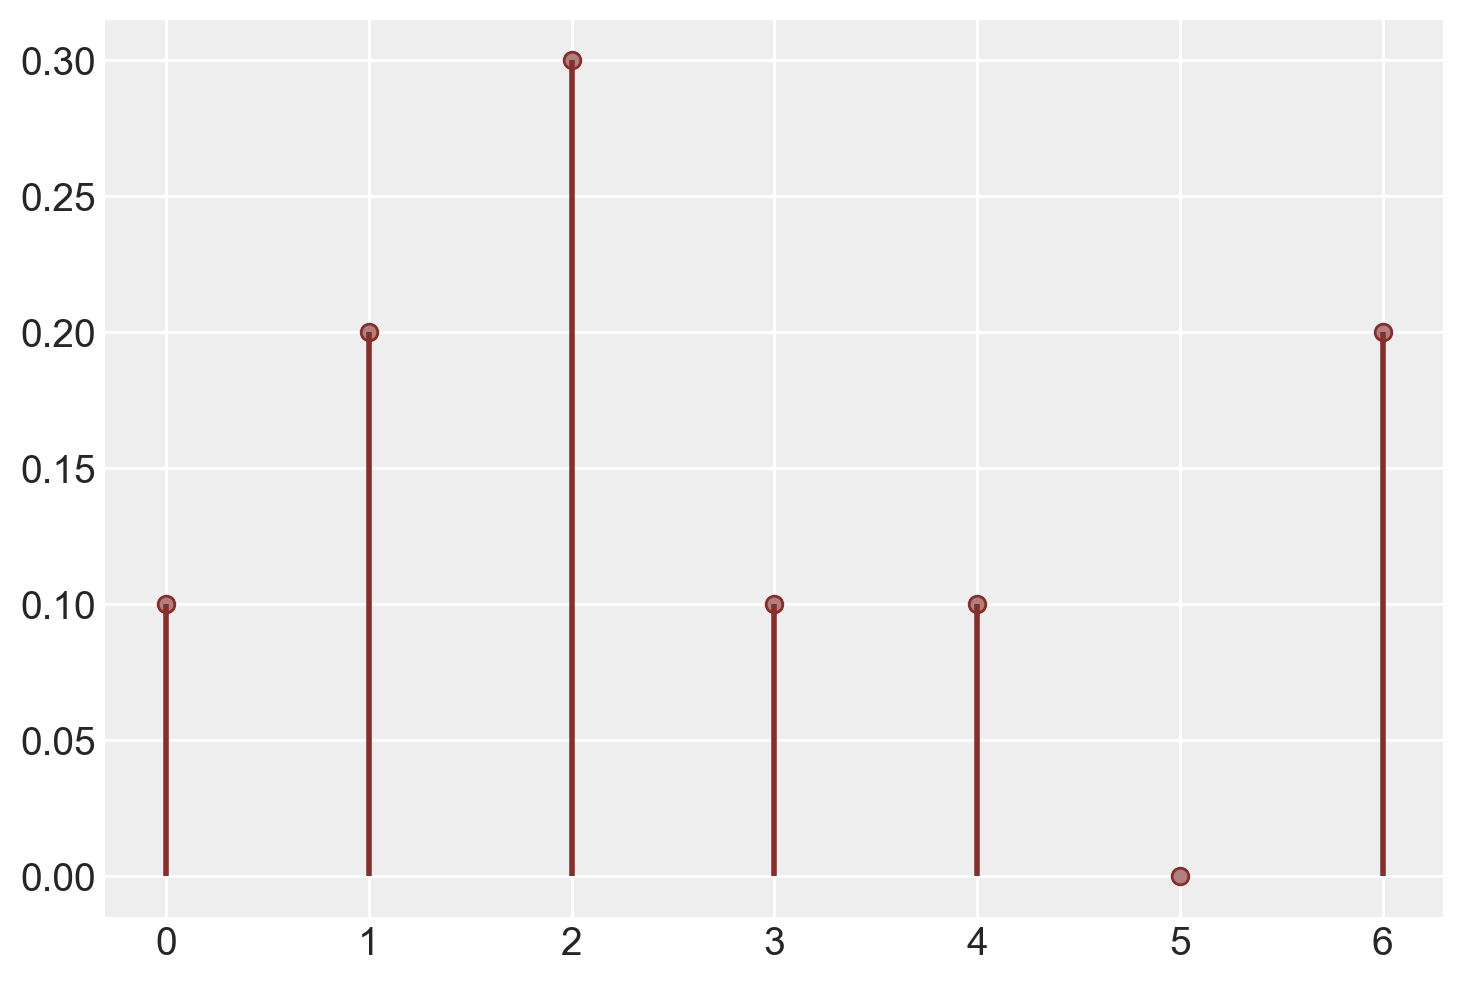

In [9]:
color_fill = "#B17F7D"
color_edge = "#832F2B"
plt.plot(x, X.pmf(x), "o", ms=6, color=color_fill, markeredgecolor=color_edge)
plt.vlines(x, 0, X.pmf(x), lw=2, colors=color_edge)
plt.show()

Calcoliamo il valore atteso di $X$ implementando la formula del valore atteso, ovvero utilizzando i vettori `x` e `px`.

In [14]:
x_ev = (x * px).sum()
x_ev

2.7

Lo stesso risultato si ottience applicando il metodo `.expect()` all'oggetto `X`.

In [15]:
x_ev = X.expect()
x_ev

2.7

Calcoliamo la varianza di $X$ usando i vettori `x` e `px`.

In [16]:
x_var = ((x - x_ev)**2 * X.pmf(x)).sum()
x_var

3.8100000000000005

Otteniamo lo stesso risultato applicando il metodo `.var()` all'oggetto `X`.

In [17]:
X.var()

3.8099999999999987

Calcoliamo la deviazione standard di $X$ prendento la radice quadrata della varianza.

In [18]:
np.sqrt(x_var)

1.9519221295943137

Oppure, in maniera equivalente, applicando il metodo `.std()` all'oggetto `X`.

In [19]:
X.std()

1.9519221295943132

## Considerazioni Conclusive

In conclusione, i concetti di valore atteso e varianza sono fondamentali per comprendere il comportamento delle variabili casuali. Il valore atteso fornisce una misura centrale, rappresentando il "valore tipico" che ci si aspetta di osservare, mentre la varianza quantifica la dispersione dei valori attorno a questa media, offrendo una visione più completa della distribuzione. Questi strumenti sono essenziali per l'analisi e la modellizzazione statistica, fornendo le basi per valutare e interpretare la variabilità nei fenomeni aleatori.

## Informazioni sull'Ambiente di Sviluppo

In [10]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Fri Aug 02 2024

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.26.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

seaborn   : 0.13.2
arviz     : 0.18.0
matplotlib: 3.9.1
scipy     : 1.14.0
numpy     : 1.26.4

Watermark: 2.4.3

